In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Normalization, Dense
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.california_housing.load_data()

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 2s 3us/step 


In [9]:
(X_train, y_train), (X_test, y_test) = data

In [13]:
tf.random.set_seed(42)

In [35]:
norm_layer = Normalization()

In [37]:
model = Sequential([
    Input(X_train.shape[1:]),
    norm_layer,
    Dense(50, activation=keras.activations.relu),
    Dense(50, activation=keras.activations.relu),
    Dense(50, activation=keras.activations.relu),
    Dense(1)
])

In [39]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

In [41]:
norm_layer.adapt(X_train)

In [47]:
model.compile(optimizer=optimizer, loss=keras.losses.mse, metrics=[keras.metrics.RootMeanSquaredError])

In [50]:
history = model.fit(X_train, y_train, epochs=100, validation_split=.2, )

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4367554048.0000 - root_mean_squared_error: 66069.4688 - val_loss: 4280316160.0000 - val_root_mean_squared_error: 65424.1250
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4358000128.0000 - root_mean_squared_error: 65997.1641 - val_loss: 4274469120.0000 - val_root_mean_squared_error: 65379.4258
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4349108736.0000 - root_mean_squared_error: 65929.8047 - val_loss: 4268672512.0000 - val_root_mean_squared_error: 65335.0781
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4340600320.0000 - root_mean_squared_error: 65865.2812 - val_loss: 4263135744.0000 - val_root_mean_squared_error: 65292.6914
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4332523520.0000 - root_mean_squared_error: 65803.9844 - val_loss: 4257677056.0000 - val_root_mean_squared_error: 65250.8789
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4324893184.000

In [53]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

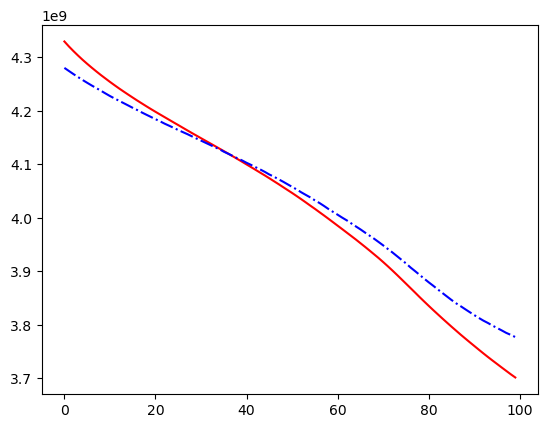

In [72]:
plt.plot(history.history["loss"], 'r-')
plt.plot(history.history['val_loss'], 'b-.')
plt.show()

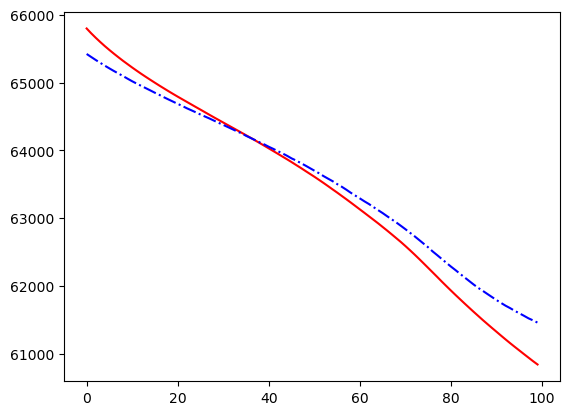

In [71]:
plt.plot(history.history["root_mean_squared_error"], 'r-')
plt.plot(history.history["val_root_mean_squared_error"], 'b-.')
plt.show()